In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import cv2

In [2]:
# Load images and labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))#, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            # Resize image and flatten from array to vector
            img = cv2.resize(img, (64, 64)).flatten()
            images.append(img)
            labels.append(label)
    return images, labels

In [3]:
# Load pleasant and unpleasant images
pleasant_images, pleasant_labels = load_images_from_folder('train-images/train/pleasant', 1)
unpleasant_images, unpleasant_labels = load_images_from_folder('train-images/train/unpleasant', 0)

In [4]:
# Combine data
X = np.array(pleasant_images + unpleasant_images)
y = np.array(pleasant_labels + unpleasant_labels)

In [5]:
# Split data into train and validation with 80/20 ration and static seed for reproducibility
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3, metric='cosine')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=3)

Accuracy: 0.7884012539184952
Precision: 0.9089108910891089
Recall: 0.6720351390922401
F1 Score: 0.7727272727272727
Confusion Matrix:
 [[547  46]
 [224 459]]


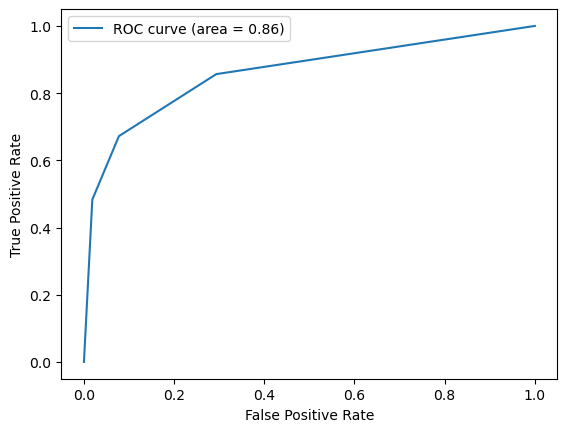

In [7]:
# Evaluate model
y_pred = knn.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, knn.predict_proba(X_val)[:, 1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [8]:
# Load and predict test images
test_df = pd.read_csv('Test-IDs.csv')
submission = []

for _, row in test_df.iterrows():
    img = cv2.imread(os.path.join('TEST_images/TEST_images', row['Filename']))#, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (64, 64)).flatten()
        prediction = knn.predict([img])[0]
        submission.append((row['ID'], prediction))

In [9]:
# Save results
submission_df = pd.DataFrame(submission, columns=['ID', 'LABEL'])
submission_df.to_csv('submission.csv', index=False)

print("Done! Results saved to submission.csv")

Done! Results saved to submission.csv
